# Rating Prediction Project

In [1]:
# import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Reading and Understanding

In [2]:
# import dataset
df = pd.read_csv("rating_prediction.csv")
df.head()

Unnamed: 0  Ratings                                             Review
0           0      5.0  This is the best laptop in this range.I reciev...
1           1      5.0  Good product as used of now.... Everything is ...
2           2      5.0  AWESOME LAPTOP. It supports many high spec gam...
3           3      4.0  For that price... it's exceptionally good. Pla...
4           4      4.0  RAM upgrade is must do because the useable RAM...

In [3]:
# check shape of the dataset
df.shape

(20240, 3)

Dataset contains 20240 records and 3 columns. 

In [4]:
# check null values present in dataset.
df.isnull().sum()

Unnamed: 0    0
Ratings       0
Review        2
dtype: int64

Review column contains 2 null values.

In [5]:
# check datatypes of the features
df.dtypes

Unnamed: 0      int64
Ratings       float64
Review         object
dtype: object

In [6]:
# check counts of the ratings column
df['Ratings'].value_counts()

5.0    7246
1.0    5271
4.0    3277
3.0    2607
2.0    1839
Name: Ratings, dtype: int64

Ratings is our target column and it is imbalanced. So, we need to apply any resampling method.

In [7]:
# Let's see the average ratings given by users
avg = df["Ratings"].mean()
avg = round(avg,1)
print("Average ratings given by users:",avg)

Average ratings given by users: 3.3


## Data Cleaning

In [8]:
# drop unnecessary column
df = df.drop("Unnamed: 0",axis=1)

In [9]:
# Remove null rows from dataset 
df = df.dropna(how="any",axis=0)

In [10]:
# convert datatype of ratings column from float to integer
df["Ratings"]=df['Ratings'].astype('int')

## Data Analysis

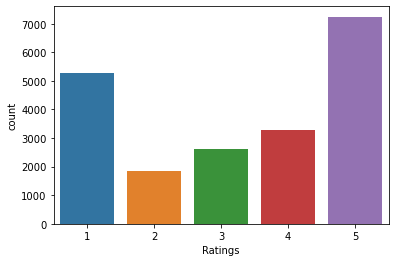

In [11]:
sns.countplot(data=df,x = "Ratings")
plt.show()

1. From the above count plot we can see that, 5 star rating is high compare to other categories. While 2 star rating is minimal.
2. Here, we can see that our target variable is imbalanced and it affect our result. So, we will use oversampling(SMOTE) method in further process.

In [12]:
# calculating reviews length
df["Review_length"] = df["Review"].str.len()

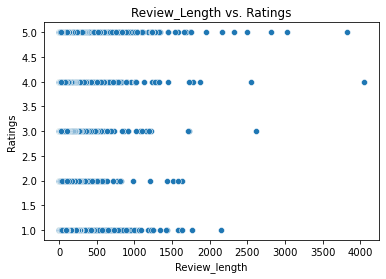

In [13]:
sns.scatterplot(data=df,x="Review_length", y="Ratings")
plt.title("Review_Length vs. Ratings")
plt.show()

From the above scatter plot we can see that, ratings is positively correlated with Reviews. Ratings is increasing with increase of review length.

## Data Preparation

In [14]:
# import useful libraries for NLP
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
stop = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [15]:
# converting reviews in lowercase
df['Cleaned_review'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()

Ratings                                             Review  Review_length  \
0        5  This is the best laptop in this range.I reciev...            500   
1        5  Good product as used of now.... Everything is ...            271   
2        5  AWESOME LAPTOP. It supports many high spec gam...             96   
3        4  For that price... it's exceptionally good. Pla...            342   
4        4  RAM upgrade is must do because the useable RAM...            500   

                                      Cleaned_review  
0  this is the best laptop in this range.i reciev...  
1  good product as used of now.... everything is ...  
2  awesome laptop. it supports many high spec gam...  
3  for that price... it's exceptionally good. pla...  
4  ram upgrade is must do because the useable ram...

In [16]:
# remove punctuation from cleaned review column
df['Cleaned_review'] = df['Cleaned_review'].str.replace('[^\w\s]','')
df

Ratings                                             Review  \
0            5  This is the best laptop in this range.I reciev...   
1            5  Good product as used of now.... Everything is ...   
2            5  AWESOME LAPTOP. It supports many high spec gam...   
3            4  For that price... it's exceptionally good. Pla...   
4            4  RAM upgrade is must do because the useable RAM...   
...        ...                                                ...   
20235        5                                     \n\n  Good\n\n   
20236        4                              \n\n  Works fine.\n\n   
20237        5                  \n\n  Easy to install and use\n\n   
20238        1  \n\n  speed drops while connected on wifi. Wor...   
20239        1  \n\n  The wan port is not working and I can’t ...   

       Review_length                                     Cleaned_review  
0                500  this is the best laptop in this rangei recieve...  
1                271  good product as used of now everything is good...  
2                 96  awesome laptop it supports many high spec game...  
3                342  for that price its exceptionally good played f...  
4                500  ram upgrade is must do because the useable ram...  
...              ...                                                ...  
20235             10                                               good  
20236             17                                         works fine  
20237             29                            easy to install and use  
20238             88  speed drops while connected on wifi works good...  
20239             88  the wan port is not working and i cant even re...  

[20238 rows x 4 columns]

In [17]:
# removing stopwords from cleaned review column
df['Cleaned_review'] = df['Cleaned_review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

Ratings                                             Review  Review_length  \
0        5  This is the best laptop in this range.I reciev...            500   
1        5  Good product as used of now.... Everything is ...            271   
2        5  AWESOME LAPTOP. It supports many high spec gam...             96   
3        4  For that price... it's exceptionally good. Pla...            342   
4        4  RAM upgrade is must do because the useable RAM...            500   

                                      Cleaned_review  
0  best laptop rangei recieved late delivery due ...  
1  good product used everything good also ssd slo...  
2  awesome laptop supports many high spec games l...  
3  price exceptionally good played far cry 4 ultr...  
4  ram upgrade must useable ram 6gb ryzen 5 3550h...

In [18]:
# now, let's remove digits from the cleaned review
df['Cleaned_review'] = df['Cleaned_review'].str.replace('\d+', '')
df.head()

Ratings                                             Review  Review_length  \
0        5  This is the best laptop in this range.I reciev...            500   
1        5  Good product as used of now.... Everything is ...            271   
2        5  AWESOME LAPTOP. It supports many high spec gam...             96   
3        4  For that price... it's exceptionally good. Pla...            342   
4        4  RAM upgrade is must do because the useable RAM...            500   

                                      Cleaned_review  
0  best laptop rangei recieved late delivery due ...  
1  good product used everything good also ssd slo...  
2  awesome laptop supports many high spec games l...  
3  price exceptionally good played far cry  ultra...  
4  ram upgrade must useable ram gb ryzen  h great...

In [19]:
# Here, we use Lemmatizing. Lemmatization is the process of converting a word to its base form.
df['Cleaned_review'] = [lemmatizer.lemmatize(x) for x in df['Cleaned_review']]
df.head()

Ratings                                             Review  Review_length  \
0        5  This is the best laptop in this range.I reciev...            500   
1        5  Good product as used of now.... Everything is ...            271   
2        5  AWESOME LAPTOP. It supports many high spec gam...             96   
3        4  For that price... it's exceptionally good. Pla...            342   
4        4  RAM upgrade is must do because the useable RAM...            500   

                                      Cleaned_review  
0  best laptop rangei recieved late delivery due ...  
1  good product used everything good also ssd slo...  
2  awesome laptop supports many high spec games l...  
3  price exceptionally good played far cry  ultra...  
4  ram upgrade must useable ram gb ryzen  h great...

In [20]:
# calculating cleaned reviews length
df["Cleaned_Review_length"] = df["Cleaned_review"].str.len()
df

Ratings                                             Review  \
0            5  This is the best laptop in this range.I reciev...   
1            5  Good product as used of now.... Everything is ...   
2            5  AWESOME LAPTOP. It supports many high spec gam...   
3            4  For that price... it's exceptionally good. Pla...   
4            4  RAM upgrade is must do because the useable RAM...   
...        ...                                                ...   
20235        5                                     \n\n  Good\n\n   
20236        4                              \n\n  Works fine.\n\n   
20237        5                  \n\n  Easy to install and use\n\n   
20238        1  \n\n  speed drops while connected on wifi. Wor...   
20239        1  \n\n  The wan port is not working and I can’t ...   

       Review_length                                     Cleaned_review  \
0                500  best laptop rangei recieved late delivery due ...   
1                271  good product used everything good also ssd slo...   
2                 96  awesome laptop supports many high spec games l...   
3                342  price exceptionally good played far cry  ultra...   
4                500  ram upgrade must useable ram gb ryzen  h great...   
...              ...                                                ...   
20235             10                                               good   
20236             17                                         works fine   
20237             29                                   easy install use   
20238             88  speed drops connected wifi works good connecte...   
20239             88  wan port working cant even return product wast...   

       Cleaned_Review_length  
0                        323  
1                        152  
2                         79  
3                        234  
4                        348  
...                      ...  
20235                      4  
20236                     10  
20237                     16  
20238                     64  
20239                     54  

[20238 rows x 5 columns]

In [21]:
# convert text into vectors using TF-IDF
tf_vec = TfidfVectorizer()
feature = tf_vec.fit_transform(df['Cleaned_review'])

# split the target column.
# here, our target column is Ratings and we treat it as a categorical data.
x = feature
y = df['Ratings']

In [22]:
x.shape

(20238, 14473)

In [23]:
# Hear, we use SMOTE(resampling) method to cop up with imbalanced classification of target variable.
# SMOTE(Synthetic Minority Oversampling Technique) algorithm generates synthetic samples of minority class.
x_smote,y_smote = smote.fit_resample(x,y)
print(x.shape)
print(y.shape)
print(x_smote.shape)
print(y_smote.shape)

(20238, 14473)
(20238,)
(36220, 14473)
(36220,)


In [24]:
# check the counts of original target column
y.value_counts()

5    7244
1    5271
4    3277
3    2607
2    1839
Name: Ratings, dtype: int64

In [25]:
# check the count of target column after oversampling 
y_smote.value_counts()

5    7244
4    7244
3    7244
2    7244
1    7244
Name: Ratings, dtype: int64

In [26]:
# convert x from matrix to array for further process
x = x_smote.toarray()

In [27]:
# split train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y_smote,test_size=0.10,random_state=42)

## Find Best Model

In [28]:
# our problem is classification type of problem.
# import useful libraries for machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model = [LogisticRegression(),DecisionTreeClassifier(),MultinomialNB()]

for m in model:
    m.fit(x_train,y_train)
    train = m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy of",m,"is:")
    print("Accuracy of training model is:",train)
    print("Accuracy Score:",accuracy_score(y_test,predm)*100)
    print("Confusion matrix:","\n",confusion_matrix(y_test,predm))
    print("Classification report:","\n",classification_report(y_test,predm))
    print("************************************************************")
    print("\n")

Accuracy of LogisticRegression() is:
Accuracy of training model is: 0.628479553058109
Accuracy Score: 56.28566169703662
Confusion matrix: 
 [[718 262  81  31  20]
 [195 708 119  36  18]
 [ 97 193 538 176  86]
 [ 36 110 165 493 230]
 [ 33  64 123 300 601]]
Classification report: 
               precision    recall  f1-score   support

           1       0.67      0.65      0.66      1112
           2       0.53      0.66      0.59      1076
           3       0.52      0.49      0.51      1090
           4       0.48      0.48      0.48      1034
           5       0.63      0.54      0.58      1121

    accuracy                           0.56      5433
   macro avg       0.56      0.56      0.56      5433
weighted avg       0.57      0.56      0.56      5433

************************************************************


Accuracy of DecisionTreeClassifier() is:
Accuracy of training model is: 0.8767661675382467
Accuracy Score: 59.61715442665194
Confusion matrix: 
 [[731 157  87  73  64]

## Bagging and Boosting methods

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf = RandomForestClassifier()

rf.fit(x_train,y_train)
train = rf.score(x_train,y_train)
predrf = rf.predict(x_test)
print("Accuracy of training model is:",train)
print("Accuracy score:",accuracy_score(y_test,predrf)*100)
print("Confusion matrix:","\n",confusion_matrix(y_test,predrf))
print("Classification report:","\n",classification_report(y_test,predrf))

Accuracy of training model is: 0.876035339591386
Accuracy score: 72.69464384318056
Confusion matrix: 
 [[568  89  42  23  20]
 [ 50 603  42  14   5]
 [ 41  46 504  77  41]
 [ 18  14  88 496  91]
 [ 35  29  61 163 462]]
Classification report: 
               precision    recall  f1-score   support

           1       0.80      0.77      0.78       742
           2       0.77      0.84      0.81       714
           3       0.68      0.71      0.70       709
           4       0.64      0.70      0.67       707
           5       0.75      0.62      0.67       750

    accuracy                           0.73      3622
   macro avg       0.73      0.73      0.73      3622
weighted avg       0.73      0.73      0.73      3622



In [31]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier()

cb.fit(x_train,y_train)
train = cb.score(x_train,y_train)
predcb = cb.predict(x_test)
print("Accuracy of training model is:",train)
print("Accuracy score:",accuracy_score(y_test,predcb)*100)
print("Confusion matrix:","\n",confusion_matrix(y_test,predcb))
print("Classification report:","\n",classification_report(y_test,predcb))

Learning rate set to 0.094239
0:	learn: 1.5847773	total: 4.71s	remaining: 1h 18m 21s
1:	learn: 1.5629761	total: 5.96s	remaining: 49m 36s
2:	learn: 1.5441881	total: 7.09s	remaining: 39m 15s
3:	learn: 1.5304961	total: 8.1s	remaining: 33m 36s
4:	learn: 1.5152769	total: 9.12s	remaining: 30m 15s
5:	learn: 1.5032380	total: 10.3s	remaining: 28m 24s
6:	learn: 1.4913938	total: 11.4s	remaining: 26m 56s
7:	learn: 1.4812807	total: 12.5s	remaining: 25m 49s
8:	learn: 1.4706970	total: 13.6s	remaining: 24m 56s
9:	learn: 1.4624072	total: 14.7s	remaining: 24m 12s
10:	learn: 1.4550699	total: 15.6s	remaining: 23m 25s
11:	learn: 1.4477649	total: 16.6s	remaining: 22m 46s
12:	learn: 1.4409666	total: 17.6s	remaining: 22m 12s
13:	learn: 1.4356627	total: 18.5s	remaining: 21m 45s
14:	learn: 1.4297324	total: 19.5s	remaining: 21m 21s
15:	learn: 1.4246230	total: 20.5s	remaining: 20m 58s
16:	learn: 1.4194475	total: 21.4s	remaining: 20m 37s
17:	learn: 1.4138544	total: 22.4s	remaining: 20m 20s
18:	learn: 1.4086681	tot

153:	learn: 1.2272301	total: 2m 34s	remaining: 14m 10s
154:	learn: 1.2266892	total: 2m 35s	remaining: 14m 9s
155:	learn: 1.2257998	total: 2m 36s	remaining: 14m 8s
156:	learn: 1.2250081	total: 2m 37s	remaining: 14m 7s
157:	learn: 1.2243042	total: 2m 38s	remaining: 14m 5s
158:	learn: 1.2235767	total: 2m 39s	remaining: 14m 4s
159:	learn: 1.2228165	total: 2m 40s	remaining: 14m 2s
160:	learn: 1.2222399	total: 2m 41s	remaining: 14m 1s
161:	learn: 1.2218114	total: 2m 42s	remaining: 14m
162:	learn: 1.2212914	total: 2m 43s	remaining: 13m 58s
163:	learn: 1.2206742	total: 2m 44s	remaining: 13m 57s
164:	learn: 1.2199317	total: 2m 45s	remaining: 13m 55s
165:	learn: 1.2193755	total: 2m 46s	remaining: 13m 54s
166:	learn: 1.2188182	total: 2m 47s	remaining: 13m 53s
167:	learn: 1.2184291	total: 2m 47s	remaining: 13m 51s
168:	learn: 1.2175872	total: 2m 48s	remaining: 13m 50s
169:	learn: 1.2169771	total: 2m 50s	remaining: 13m 50s
170:	learn: 1.2165440	total: 2m 51s	remaining: 13m 49s
171:	learn: 1.2162058

304:	learn: 1.1599660	total: 5m 2s	remaining: 11m 29s
305:	learn: 1.1598090	total: 5m 3s	remaining: 11m 28s
306:	learn: 1.1596088	total: 5m 4s	remaining: 11m 27s
307:	learn: 1.1594543	total: 5m 5s	remaining: 11m 25s
308:	learn: 1.1592349	total: 5m 6s	remaining: 11m 24s
309:	learn: 1.1591057	total: 5m 7s	remaining: 11m 23s
310:	learn: 1.1589123	total: 5m 8s	remaining: 11m 22s
311:	learn: 1.1586949	total: 5m 9s	remaining: 11m 21s
312:	learn: 1.1583450	total: 5m 10s	remaining: 11m 20s
313:	learn: 1.1579305	total: 5m 10s	remaining: 11m 19s
314:	learn: 1.1577573	total: 5m 11s	remaining: 11m 18s
315:	learn: 1.1574238	total: 5m 12s	remaining: 11m 17s
316:	learn: 1.1570714	total: 5m 13s	remaining: 11m 16s
317:	learn: 1.1565294	total: 5m 15s	remaining: 11m 15s
318:	learn: 1.1563896	total: 5m 16s	remaining: 11m 14s
319:	learn: 1.1562251	total: 5m 17s	remaining: 11m 13s
320:	learn: 1.1559692	total: 5m 17s	remaining: 11m 12s
321:	learn: 1.1554442	total: 5m 18s	remaining: 11m 11s
322:	learn: 1.1552

456:	learn: 1.1270016	total: 7m 29s	remaining: 8m 54s
457:	learn: 1.1267889	total: 7m 30s	remaining: 8m 53s
458:	learn: 1.1265451	total: 7m 31s	remaining: 8m 52s
459:	learn: 1.1263360	total: 7m 32s	remaining: 8m 51s
460:	learn: 1.1260256	total: 7m 33s	remaining: 8m 50s
461:	learn: 1.1257792	total: 7m 34s	remaining: 8m 49s
462:	learn: 1.1255935	total: 7m 35s	remaining: 8m 48s
463:	learn: 1.1253391	total: 7m 36s	remaining: 8m 47s
464:	learn: 1.1251485	total: 7m 37s	remaining: 8m 46s
465:	learn: 1.1250361	total: 7m 38s	remaining: 8m 45s
466:	learn: 1.1247808	total: 7m 39s	remaining: 8m 44s
467:	learn: 1.1244163	total: 7m 40s	remaining: 8m 43s
468:	learn: 1.1243304	total: 7m 41s	remaining: 8m 42s
469:	learn: 1.1241479	total: 7m 42s	remaining: 8m 41s
470:	learn: 1.1239765	total: 7m 43s	remaining: 8m 40s
471:	learn: 1.1235295	total: 7m 44s	remaining: 8m 39s
472:	learn: 1.1234158	total: 7m 45s	remaining: 8m 38s
473:	learn: 1.1232803	total: 7m 46s	remaining: 8m 37s
474:	learn: 1.1231249	total:

609:	learn: 1.1012260	total: 9m 56s	remaining: 6m 21s
610:	learn: 1.1010280	total: 9m 57s	remaining: 6m 20s
611:	learn: 1.1009801	total: 9m 58s	remaining: 6m 19s
612:	learn: 1.1008136	total: 9m 59s	remaining: 6m 18s
613:	learn: 1.1007084	total: 10m	remaining: 6m 17s
614:	learn: 1.1005990	total: 10m 1s	remaining: 6m 16s
615:	learn: 1.1003555	total: 10m 2s	remaining: 6m 15s
616:	learn: 1.1001852	total: 10m 3s	remaining: 6m 14s
617:	learn: 1.1000872	total: 10m 4s	remaining: 6m 13s
618:	learn: 1.1000042	total: 10m 5s	remaining: 6m 12s
619:	learn: 1.0998926	total: 10m 6s	remaining: 6m 11s
620:	learn: 1.0997972	total: 10m 7s	remaining: 6m 10s
621:	learn: 1.0996911	total: 10m 8s	remaining: 6m 9s
622:	learn: 1.0995309	total: 10m 8s	remaining: 6m 8s
623:	learn: 1.0991873	total: 10m 9s	remaining: 6m 7s
624:	learn: 1.0990866	total: 10m 10s	remaining: 6m 6s
625:	learn: 1.0989074	total: 10m 11s	remaining: 6m 5s
626:	learn: 1.0987137	total: 10m 12s	remaining: 6m 4s
627:	learn: 1.0986002	total: 10m 1

760:	learn: 1.0814740	total: 12m 22s	remaining: 3m 53s
761:	learn: 1.0813583	total: 12m 23s	remaining: 3m 52s
762:	learn: 1.0813102	total: 12m 24s	remaining: 3m 51s
763:	learn: 1.0811058	total: 12m 25s	remaining: 3m 50s
764:	learn: 1.0810474	total: 12m 26s	remaining: 3m 49s
765:	learn: 1.0806824	total: 12m 27s	remaining: 3m 48s
766:	learn: 1.0805548	total: 12m 28s	remaining: 3m 47s
767:	learn: 1.0805078	total: 12m 29s	remaining: 3m 46s
768:	learn: 1.0803597	total: 12m 30s	remaining: 3m 45s
769:	learn: 1.0802991	total: 12m 31s	remaining: 3m 44s
770:	learn: 1.0802125	total: 12m 32s	remaining: 3m 43s
771:	learn: 1.0799326	total: 12m 33s	remaining: 3m 42s
772:	learn: 1.0797472	total: 12m 34s	remaining: 3m 41s
773:	learn: 1.0796868	total: 12m 35s	remaining: 3m 40s
774:	learn: 1.0796124	total: 12m 36s	remaining: 3m 39s
775:	learn: 1.0795609	total: 12m 37s	remaining: 3m 38s
776:	learn: 1.0794879	total: 12m 38s	remaining: 3m 37s
777:	learn: 1.0793865	total: 12m 39s	remaining: 3m 36s
778:	learn

910:	learn: 1.0665266	total: 14m 51s	remaining: 1m 27s
911:	learn: 1.0664800	total: 14m 52s	remaining: 1m 26s
912:	learn: 1.0662731	total: 14m 53s	remaining: 1m 25s
913:	learn: 1.0662140	total: 14m 54s	remaining: 1m 24s
914:	learn: 1.0660833	total: 14m 55s	remaining: 1m 23s
915:	learn: 1.0660379	total: 14m 56s	remaining: 1m 22s
916:	learn: 1.0658864	total: 14m 57s	remaining: 1m 21s
917:	learn: 1.0658379	total: 14m 58s	remaining: 1m 20s
918:	learn: 1.0657832	total: 15m	remaining: 1m 19s
919:	learn: 1.0655609	total: 15m 1s	remaining: 1m 18s
920:	learn: 1.0654933	total: 15m 2s	remaining: 1m 17s
921:	learn: 1.0654066	total: 15m 3s	remaining: 1m 16s
922:	learn: 1.0651584	total: 15m 4s	remaining: 1m 15s
923:	learn: 1.0650827	total: 15m 5s	remaining: 1m 14s
924:	learn: 1.0649721	total: 15m 6s	remaining: 1m 13s
925:	learn: 1.0648260	total: 15m 8s	remaining: 1m 12s
926:	learn: 1.0647714	total: 15m 9s	remaining: 1m 11s
927:	learn: 1.0646796	total: 15m 10s	remaining: 1m 10s
928:	learn: 1.0646064	

From above all the results, we got best accuracy using random forest classifier. which is 72.69%. 

In [30]:
# Save best result
df1 = pd.DataFrame(predrf)
df1.to_csv("rf_ratingprediction.csv")

In [31]:
# Save best model
import joblib
joblib.dump(rf,"rf_ratingprediction.obj")

['rf_ratingprediction.obj']